Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tasa de muestreo: 44100 Hz
Forma del audio: (88200, 2)


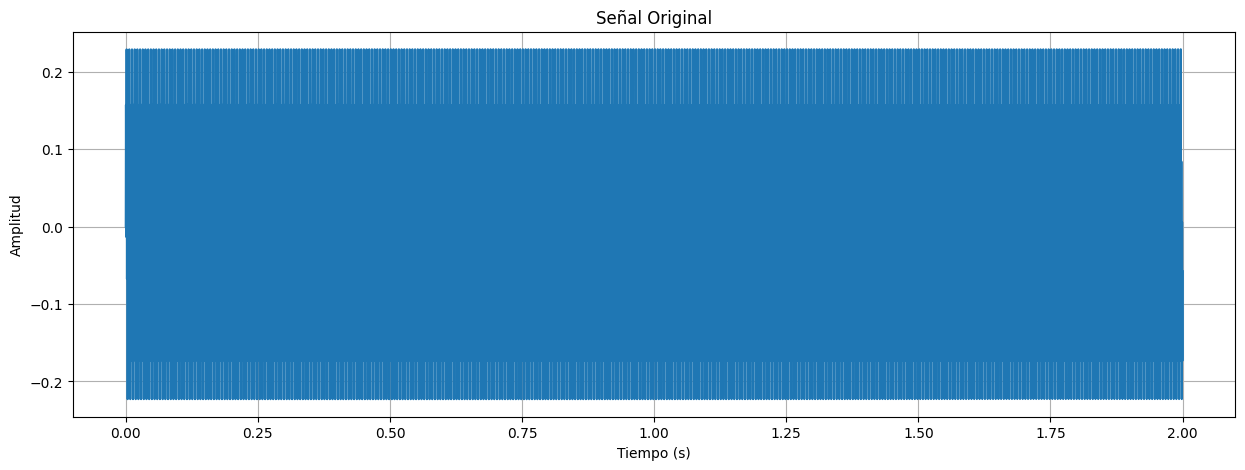

In [ ]:
3# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar librerías
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import resample  # Para remuestrear la señal

# Ruta del archivo de audio
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

# Cargar audio
sr, audio = wavfile.read(audio_path)
audio = audio.astype(float) / np.iinfo(audio.dtype).max  # Normalizar

# Información del audio
print(f"Tasa de muestreo: {sr} Hz")
print(f"Forma del audio: {audio.shape}")

# Visualizar señal original
plt.figure(figsize=(15, 5))
plt.title('Señal Original')
plt.plot(np.arange(len(audio))/sr, audio[:, 0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

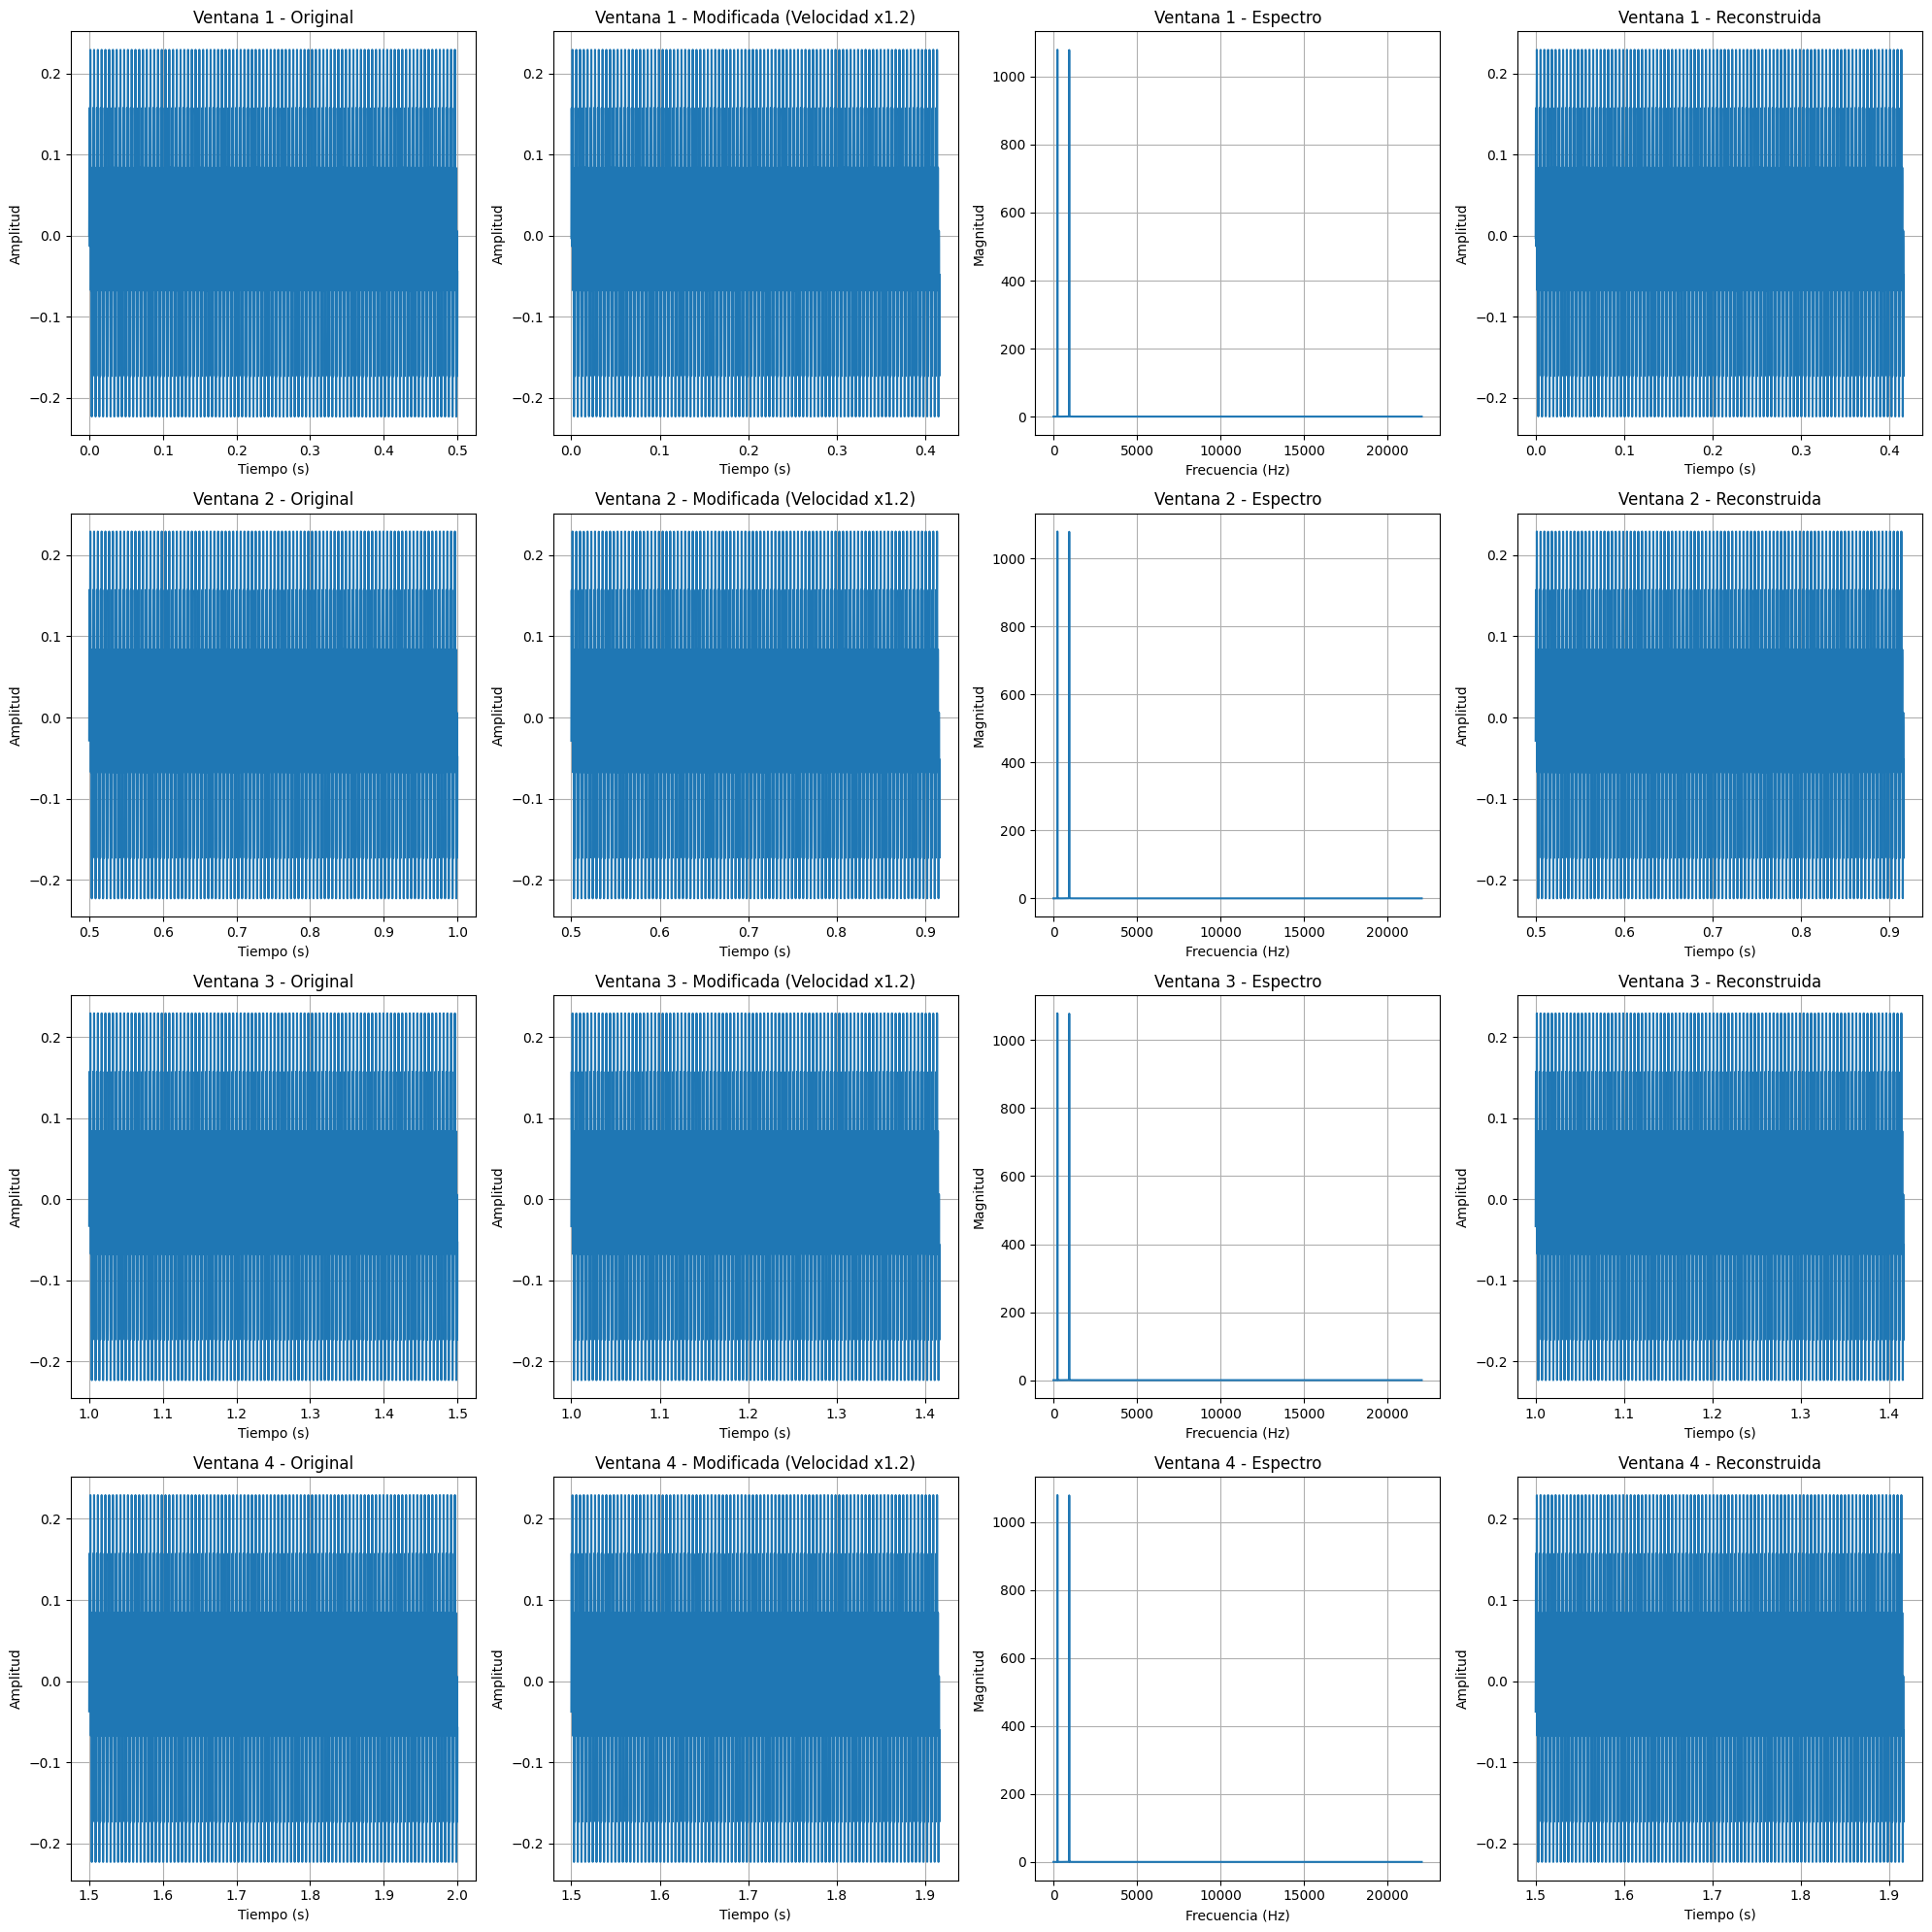

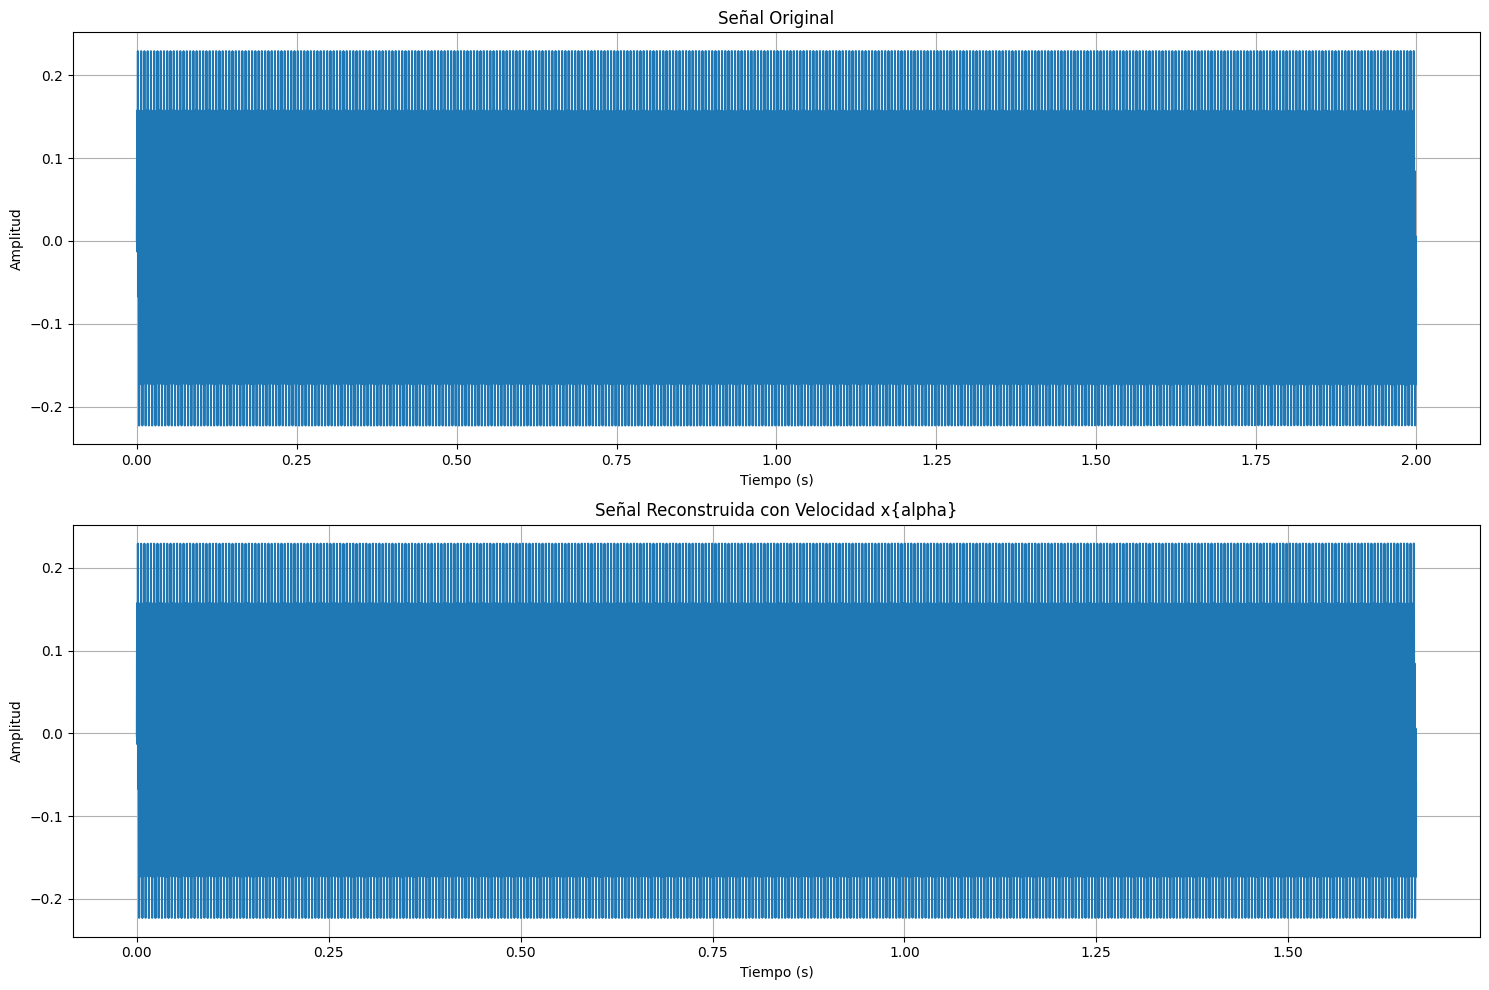

In [ ]:
# Parámetros
window_time = 0.5  # Duración de la ventana en segundos
window_size = int(window_time * sr)  # Número de muestras por ventana
alpha = 1.2  # Factor de velocidad (alpha > 1 acelera, alpha < 1 ralentiza)

# Dividir en ventanas
n_windows = len(audio) // window_size
windows = [audio[i * window_size : (i + 1) * window_size, 0] for i in range(n_windows)]

# Procesamiento y visualización
processed_windows = []
plt.figure(figsize=(20, 5*n_windows))

for i, window in enumerate(windows):
    # Visualizar ventana original
    plt.subplot(n_windows, 4, 4*i + 1)
    plt.title(f'Ventana {i+1} - Original')
    plt.plot(np.arange(len(window))/sr + i*window_time, window)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

    # Remuestrear la señal para cambiar la velocidad
    new_size = int(len(window) / alpha)  # Reducir muestras si alpha > 1
    modified_window = resample(window, new_size)

    # Visualizar ventana modificada (remuestreada)
    plt.subplot(n_windows, 4, 4*i + 2)
    plt.title(f'Ventana {i+1} - Modificada (Velocidad x{alpha})')
    plt.plot(np.arange(len(modified_window))/sr + i*window_time, modified_window)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

    # Calcular FFT
    fft_result = np.fft.fft(modified_window)

    # Visualizar espectro de frecuencia
    plt.subplot(n_windows, 4, 4*i + 3)
    plt.title(f'Ventana {i+1} - Espectro')
    freqs = np.fft.fftfreq(len(fft_result), 1/sr)
    plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid(True)

    # Calcular IFFT
    ifft_result = np.fft.ifft(fft_result)
    processed_windows.append(ifft_result)

    # Visualizar ventana reconstruida
    plt.subplot(n_windows, 4, 4*i + 4)
    plt.title(f'Ventana {i+1} - Reconstruida')
    plt.plot(np.arange(len(ifft_result))/sr + i*window_time, np.real(ifft_result))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Reconstruir señal final
reconstructed = np.concatenate(processed_windows)

# Comparar señal original vs. reconstruida
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title('Señal Original')
plt.plot(np.arange(len(audio))/sr, audio[:, 0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('Señal Reconstruida con Velocidad x{alpha}')
plt.plot(np.arange(len(reconstructed))/sr, np.real(reconstructed))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

prueba 2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


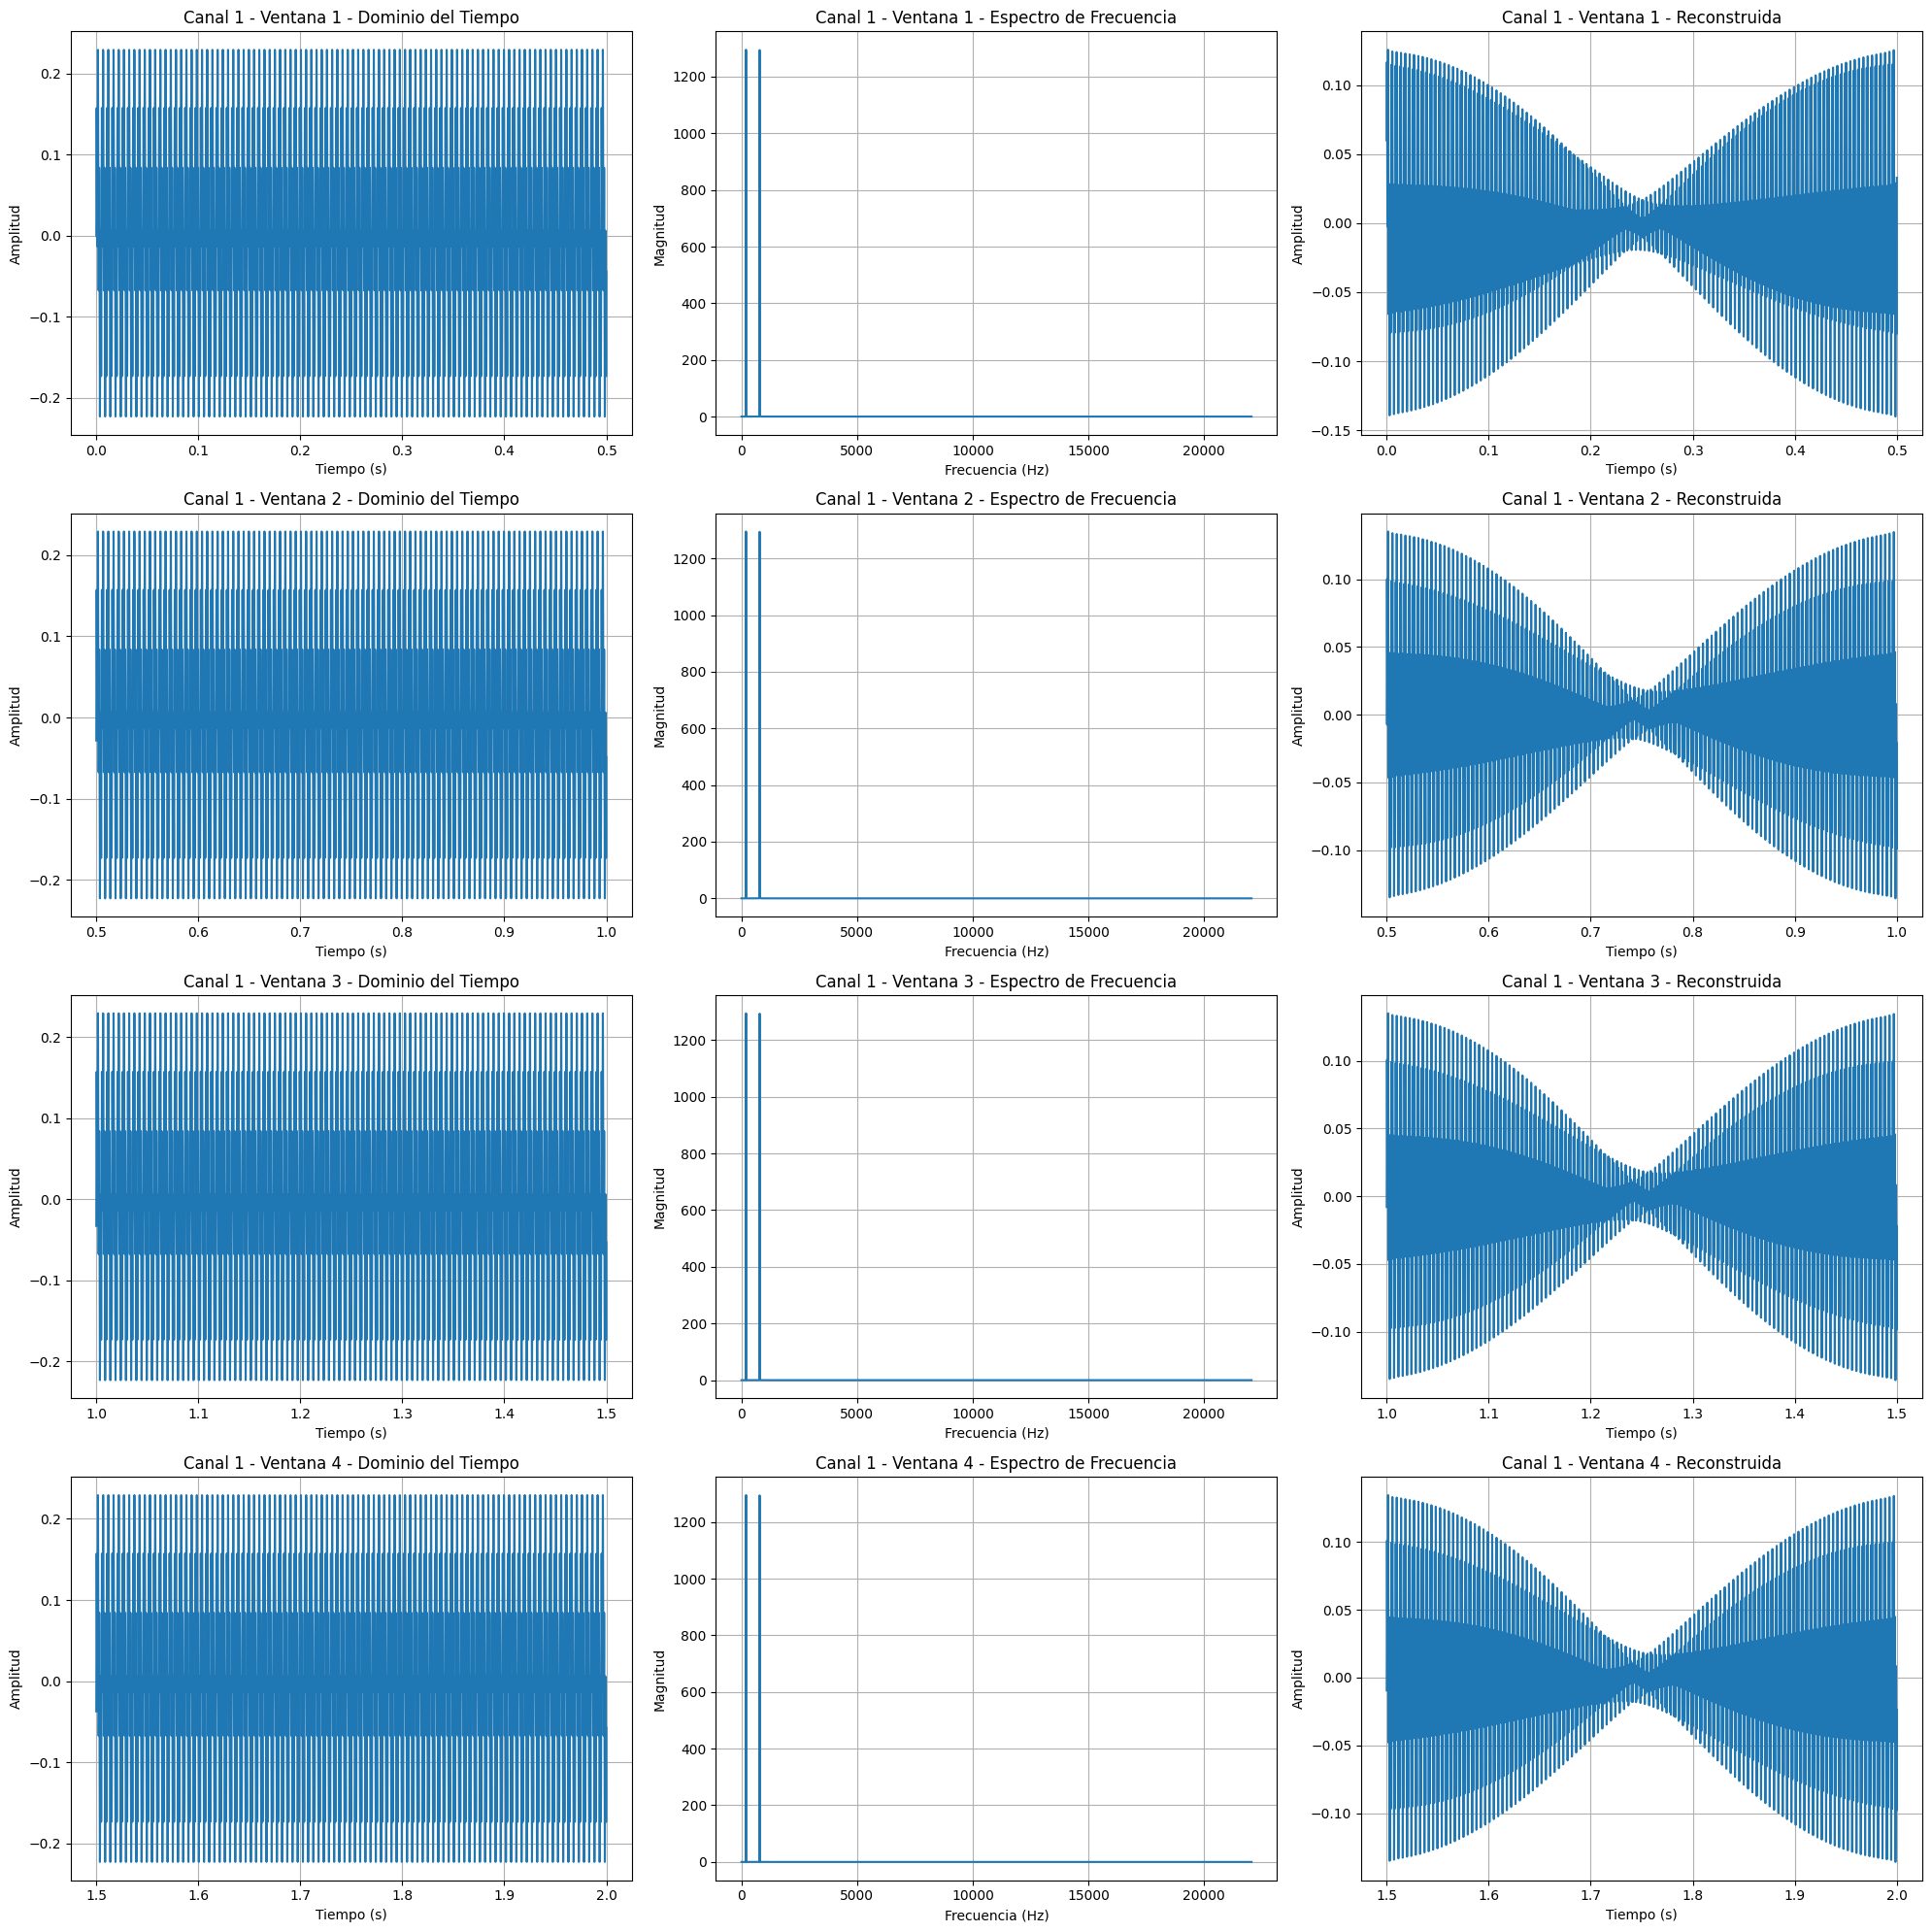

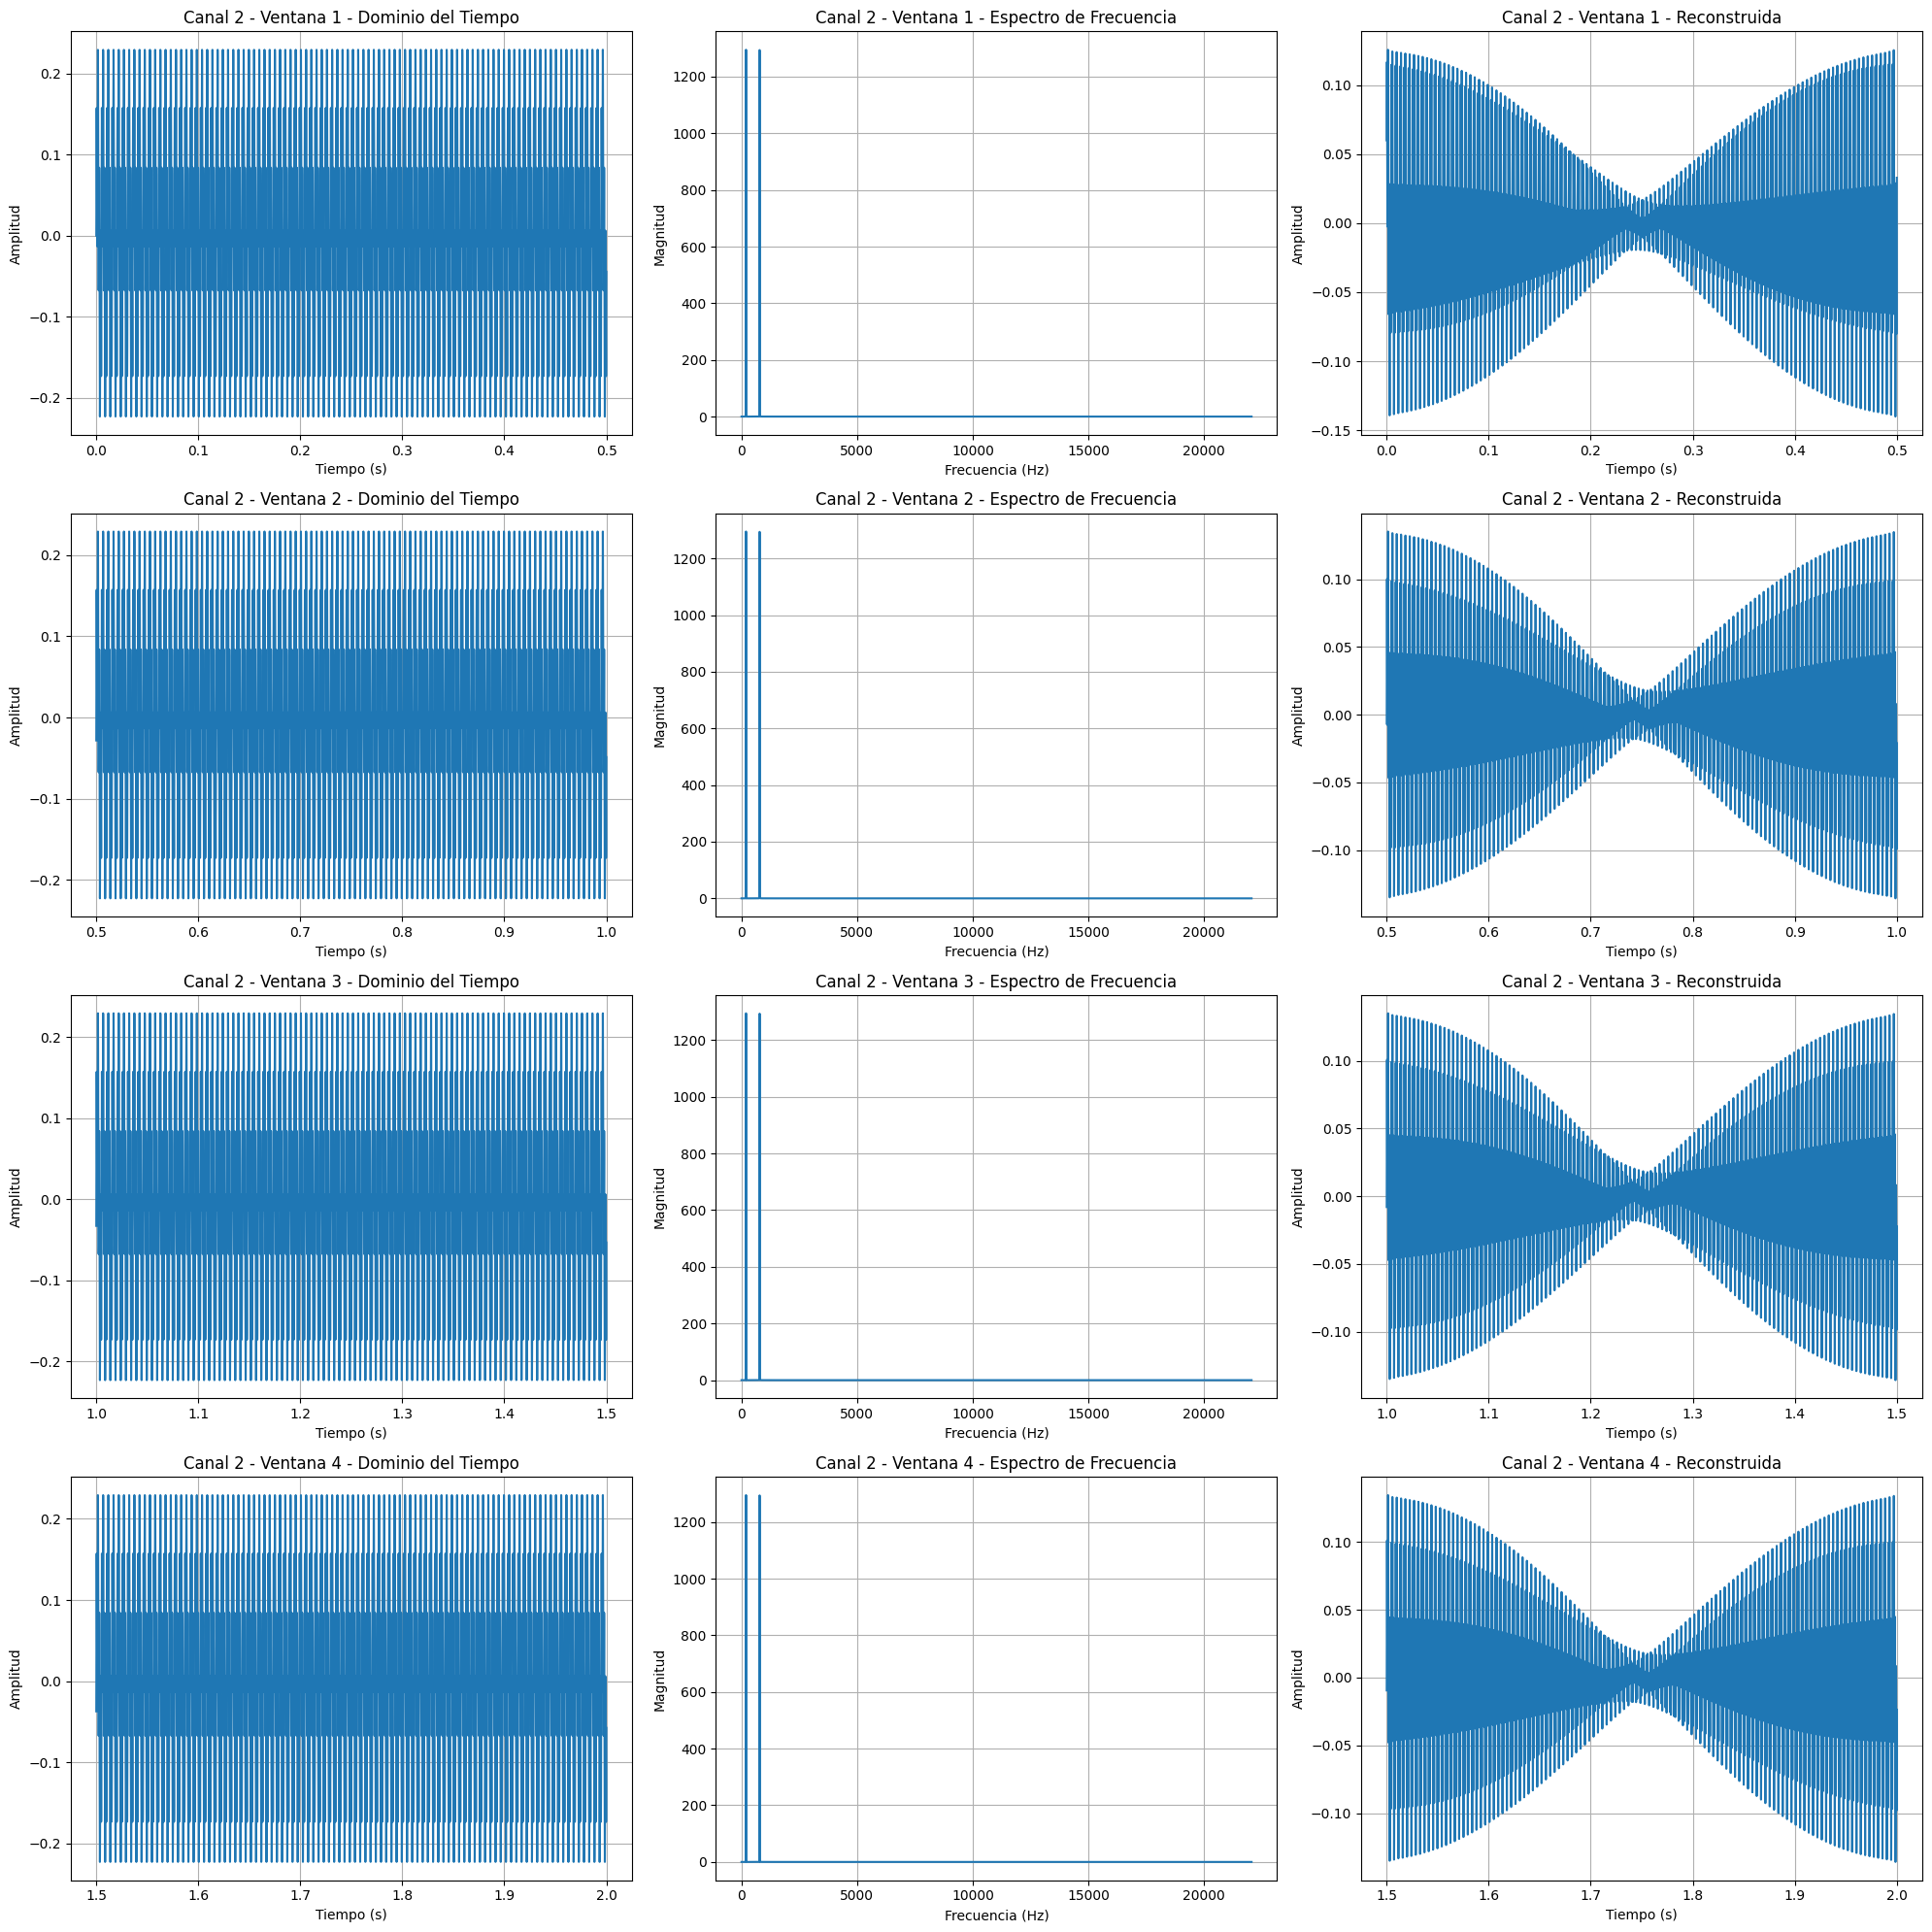

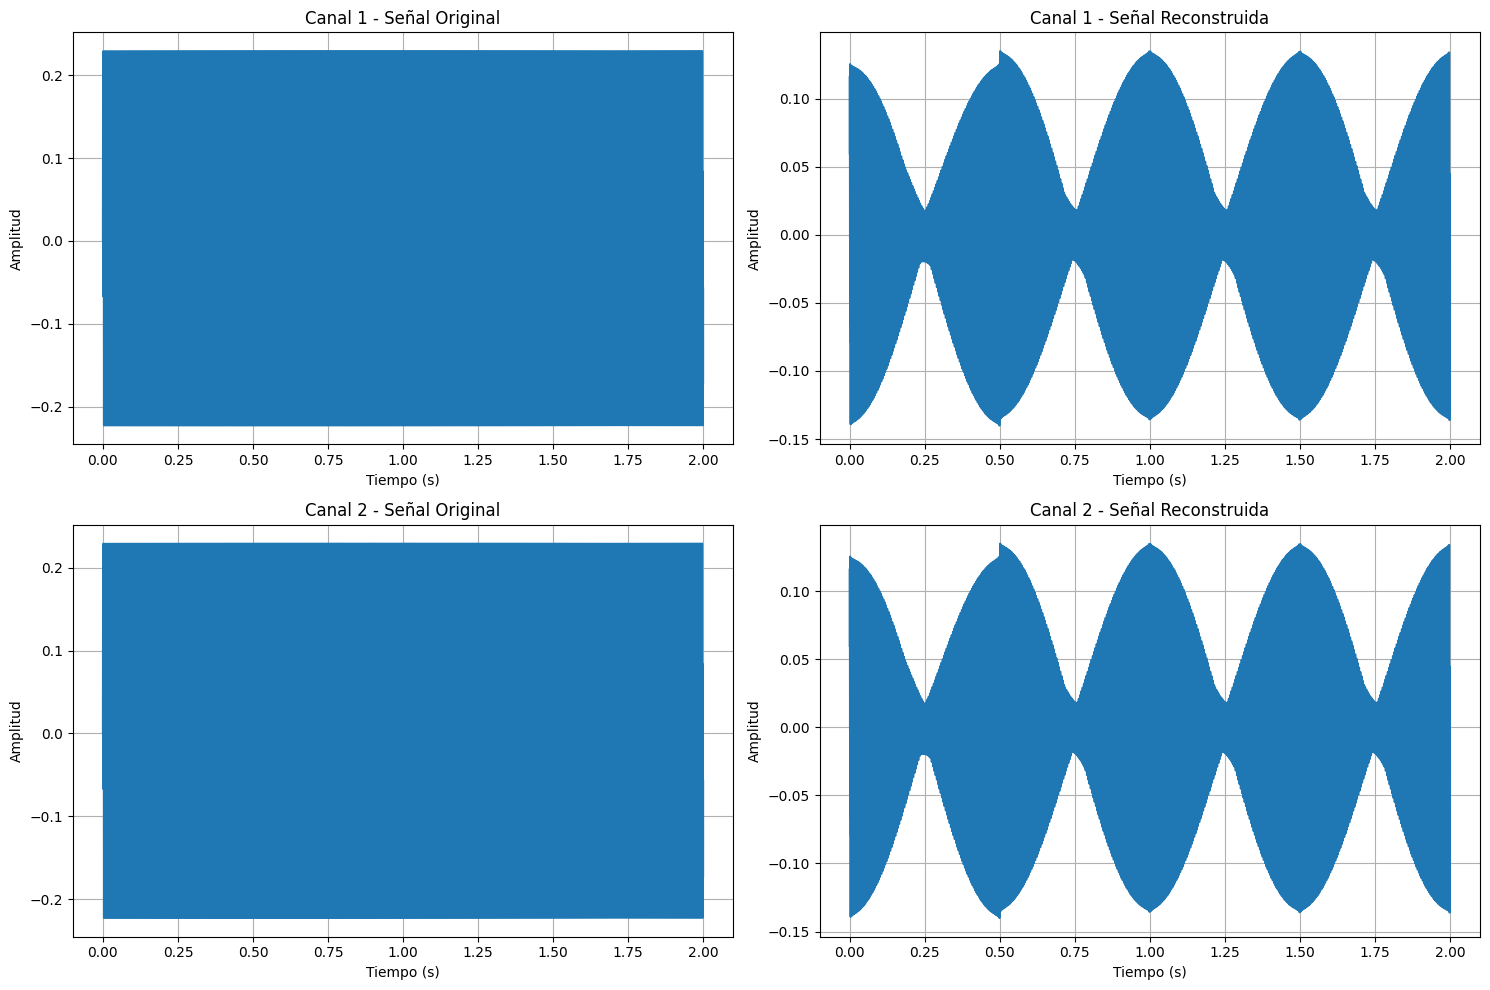

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from google.colab import drive

# Sección 1: Montar Drive y cargar audio
drive.mount('/content/drive')

# Ruta del audio
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

# Cargar audio
sr, audio = wavfile.read(audio_path)
audio = audio.astype(float) / np.iinfo(audio.dtype).max  # Normalizar

# Verificar número de canales
if len(audio.shape) == 1:
    audio = np.expand_dims(audio, axis=1)  # Convertir mono a pseudo-estéreo
n_channels = audio.shape[1]

# Sección 2: Procesamiento y Visualización
# Parámetros
duration_target = 2.0  # Duración deseada en segundos
alpha = 1.2  # Factor de velocidad (alpha > 1 acelera, alpha < 1 ralentiza)
window_time = 0.5  # Duración de cada ventana
window_size = int(window_time * sr)
n_windows = len(audio) // window_size

# Procesar cada canal por separado
reconstructed_channels = []

for ch in range(n_channels):
    processed_windows = []
    plt.figure(figsize=(20, 5*n_windows))

    for i in range(n_windows):
        start = i * window_size
        end = start + window_size
        window = audio[start:end, ch]  # Tomar solo el canal actual

        # Aplicar FFT
        fft_result = np.fft.fft(window)
        freqs = np.fft.fftfreq(len(fft_result), 1/sr)

        # Reescalar espectro en frecuencia
        new_freqs = freqs / alpha
        magnitude = np.abs(fft_result)
        phase = np.angle(fft_result)

        # Asegurar simetría conjugada
        pos_mask = freqs >= 0
        new_magnitude = np.interp(new_freqs[pos_mask], freqs[pos_mask], magnitude[pos_mask], left=0, right=0)
        new_fft = np.zeros_like(fft_result, dtype=complex)
        new_fft[pos_mask] = new_magnitude * np.exp(1j * phase[pos_mask])
        new_fft[~pos_mask] = np.conj(new_fft[pos_mask[::-1]])

        # Transformada Inversa
        ifft_result = np.fft.ifft(new_fft).real
        processed_windows.append(ifft_result)

        # Visualizar proceso para cada ventana
        plt.subplot(n_windows, 3, 3*i + 1)
        plt.title(f'Canal {ch+1} - Ventana {i+1} - Dominio del Tiempo')
        plt.plot(np.linspace(i*window_time, (i+1)*window_time, len(window)), window)
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.grid(True)

        plt.subplot(n_windows, 3, 3*i + 2)
        plt.title(f'Canal {ch+1} - Ventana {i+1} - Espectro de Frecuencia')
        plt.plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2])
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Magnitud')
        plt.grid(True)

        plt.subplot(n_windows, 3, 3*i + 3)
        plt.title(f'Canal {ch+1} - Ventana {i+1} - Reconstruida')
        plt.plot(np.linspace(i*window_time, (i+1)*window_time, len(ifft_result)), ifft_result)
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Reconstrucción de la señal final por canal
    reconstructed = np.concatenate(processed_windows)

    # Ajustar duración final
    target_samples = int(duration_target * sr)
    reconstructed = np.interp(np.linspace(0, 1, target_samples), np.linspace(0, 1, len(reconstructed)), reconstructed)
    reconstructed_channels.append(reconstructed)

# Convertir la lista a array numpy para almacenamiento en estéreo
reconstructed_audio = np.column_stack(reconstructed_channels)

# Comparación de señal original vs final
plt.figure(figsize=(15, 10))
for ch in range(n_channels):
    plt.subplot(n_channels, 2, 2*ch + 1)
    plt.title(f'Canal {ch+1} - Señal Original')
    plt.plot(np.linspace(0, duration_target, len(audio[:, ch])), audio[:, ch])
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(n_channels, 2, 2*ch + 2)
    plt.title(f'Canal {ch+1} - Señal Reconstruida')
    plt.plot(np.linspace(0, duration_target, len(reconstructed_audio[:, ch])), reconstructed_audio[:, ch])
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

**👾👾👾👾👾👾👾¿WHAT?👾👾👾👾👾👾👾👾**

PITCH SHIFT

Mounted at /content/drive


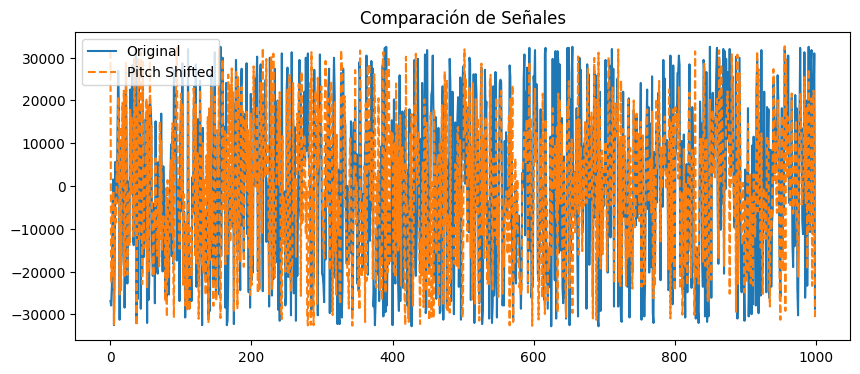

Archivo guardado en: /content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_pitch_shift.wav


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, istft

# Ruta del archivo en Google Drive
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

# Cargar el archivo de audio
sample_rate, audio = wavfile.read(audio_path)

# Si el audio tiene más de un canal, convertirlo a mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1).astype(np.int16)

# Función para aplicar Pitch Shift usando Phase Vocoder
def pitch_shift(audio, sample_rate, semitones):
    factor = 2 ** (semitones / 12)  # Factor de escalamiento del tono
    window_size = 1024
    hop_size = window_size // 4

    # Calcular la STFT
    f, t, Zxx = stft(audio, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    # Ajustar la frecuencia multiplicando por el factor de pitch shift
    new_f = f * factor
    shifted_Zxx = np.zeros_like(Zxx, dtype=np.complex_)

    # Interpolación para reubicar las frecuencias en la STFT
    for i in range(len(t)):
        shifted_Zxx[:, i] = np.interp(new_f, f, np.abs(Zxx[:, i])) * np.exp(1j * np.angle(Zxx[:, i]))

    # Reconstrucción de la señal con la iSTFT
    _, shifted_audio = istft(shifted_Zxx, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    return shifted_audio.astype(np.int16)

# Aplicar Pitch Shift (Ejemplo: +3 semitonos)
shifted_audio = pitch_shift(audio, sample_rate, semitones=3)

# Guardar el archivo modificado en Google Drive
output_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_pitch_shift.wav"
wavfile.write(output_path, sample_rate, shifted_audio)

# Graficar la señal original y la modificada
plt.figure(figsize=(10, 4))
plt.plot(audio[:1000], label="Original")
plt.plot(shifted_audio[:1000], label="Pitch Shifted", linestyle="dashed")
plt.legend()
plt.title("Comparación de Señales")
plt.show()

print(f"Archivo guardado en: {output_path}")

TIME STRETCH

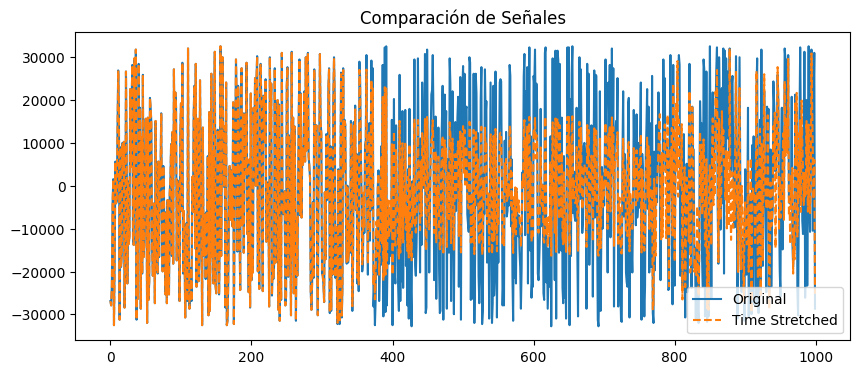

Archivo guardado en: /content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_time_stretch22.wav


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, istft

# Ruta del archivo en Google Drive
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

# Cargar el archivo de audio
sample_rate, audio = wavfile.read(audio_path)

# Si el audio tiene más de un canal, convertirlo a mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1).astype(np.int16)

# Función para aplicar Time Stretch usando Phase Vocoder
def time_stretch(audio, sample_rate, stretch_factor):
    window_size = 1024
    hop_size = window_size // 4

    # Calcular la STFT
    f, t, Zxx = stft(audio, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    # Ajustar la escala temporal
    new_t = np.linspace(0, t[-1], int(len(t) * stretch_factor))
    stretched_Zxx = np.zeros((Zxx.shape[0], len(new_t)), dtype=np.complex_)

    # Interpolación para ajustar la duración
    for i in range(Zxx.shape[0]):
        stretched_Zxx[i, :] = np.interp(new_t, t, Zxx[i, :])

    # Reconstrucción de la señal con la iSTFT
    _, stretched_audio = istft(stretched_Zxx, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    return stretched_audio.astype(np.int16)

# Aplicar Time Stretch (Ejemplo: 1.5x más lento)
stretched_audio = time_stretch(audio, sample_rate, stretch_factor=2.0)

# Guardar el archivo modificado en Google Drive
output_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_time_stretch22.wav"
wavfile.write(output_path, sample_rate, stretched_audio)

# Graficar la señal original y la modificada
plt.figure(figsize=(10, 4))
plt.plot(audio[:1000], label="Original")
plt.plot(stretched_audio[:1000], label="Time Stretched", linestyle="dashed")
plt.legend()
plt.title("Comparación de Señales")
plt.show()

print(f"Archivo guardado en: {output_path}")

TIME STRETCH 2.0

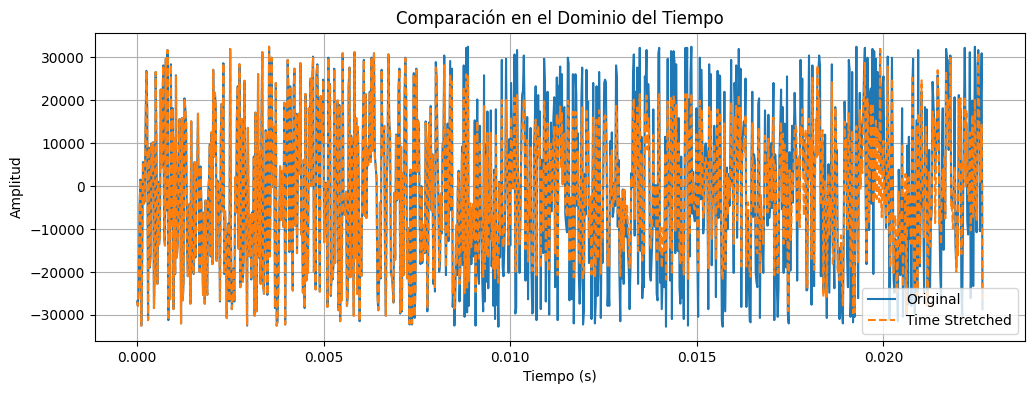

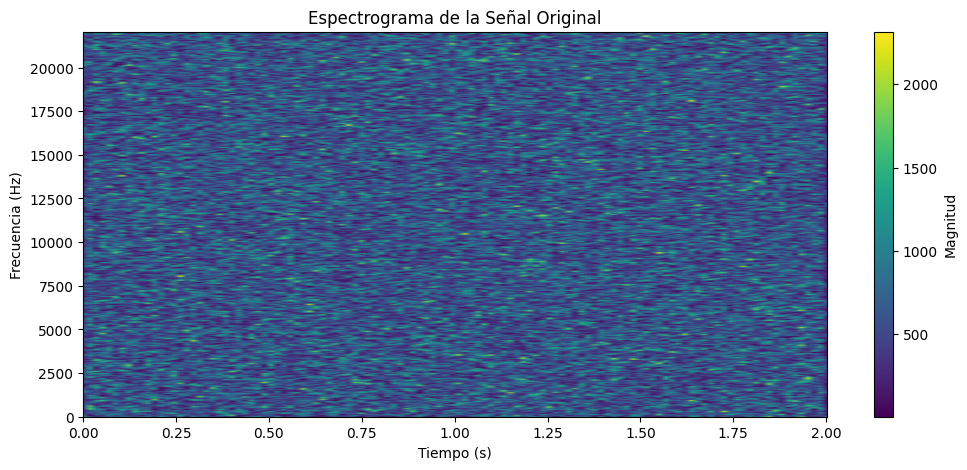

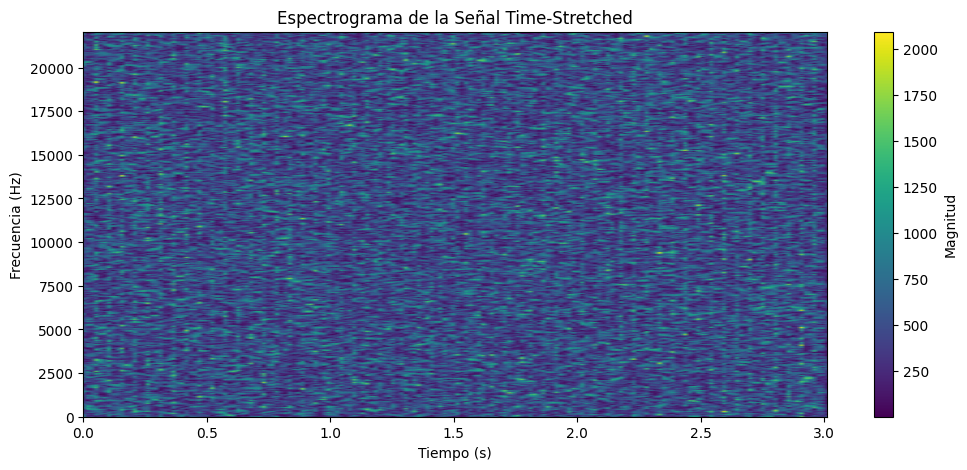

Archivo guardado en: /content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_time_stretch.wav


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, istft

# Ruta del archivo en Google Drive
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

# Cargar el archivo de audio
sample_rate, audio = wavfile.read(audio_path)

# Si el audio tiene más de un canal, convertirlo a mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1).astype(np.int16)

# Función para aplicar Time Stretch usando Phase Vocoder
def time_stretch(audio, sample_rate, stretch_factor):
    window_size = 1024
    hop_size = window_size // 4

    # Calcular la STFT
    f, t, Zxx = stft(audio, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    # Ajustar la escala temporal
    new_t = np.linspace(0, t[-1], int(len(t) * stretch_factor))
    stretched_Zxx = np.zeros((Zxx.shape[0], len(new_t)), dtype=np.complex_)

    # Interpolación para ajustar la duración
    for i in range(Zxx.shape[0]):
        stretched_Zxx[i, :] = np.interp(new_t, t, Zxx[i, :])

    # Reconstrucción de la señal con la iSTFT
    _, stretched_audio = istft(stretched_Zxx, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    return stretched_audio.astype(np.int16)

# Aplicar Time Stretch (Ejemplo: 1.5x más lento)
stretched_audio = time_stretch(audio, sample_rate, stretch_factor=1.5)

# Guardar el archivo modificado en Google Drive
output_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test_time_stretch.wav"
wavfile.write(output_path, sample_rate, stretched_audio)

# ----- PLOTEAR GRÁFICAS -----

# 1️⃣ Señales en el dominio del tiempo (Antes y después)
plt.figure(figsize=(12, 4))
time_original = np.linspace(0, len(audio) / sample_rate, num=len(audio))
time_stretched = np.linspace(0, len(stretched_audio) / sample_rate, num=len(stretched_audio))

plt.plot(time_original[:1000], audio[:1000], label="Original")
plt.plot(time_stretched[:1000], stretched_audio[:1000], label="Time Stretched", linestyle="dashed")
plt.xlabel("Tiempo (s)")  # Etiqueta del eje X
plt.ylabel("Amplitud")  # Etiqueta del eje Y
plt.title("Comparación en el Dominio del Tiempo")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Espectrograma de la señal original
plt.figure(figsize=(12, 5))
f, t, Zxx = stft(audio, fs=sample_rate, nperseg=1024, noverlap=256)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Espectrograma de la Señal Original")
plt.colorbar(label="Magnitud")
plt.show()

# 3️⃣ Espectrograma de la señal modificada
plt.figure(figsize=(12, 5))
f, t, Zxx = stft(stretched_audio, fs=sample_rate, nperseg=1024, noverlap=256)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Espectrograma de la Señal Time-Stretched")
plt.colorbar(label="Magnitud")
plt.show()

print(f"Archivo guardado en: {output_path}")

PITCH SHIFT 2.0

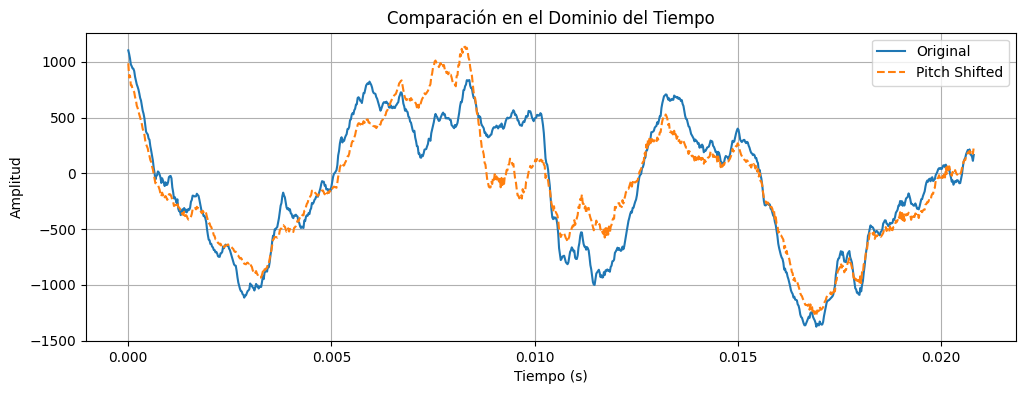

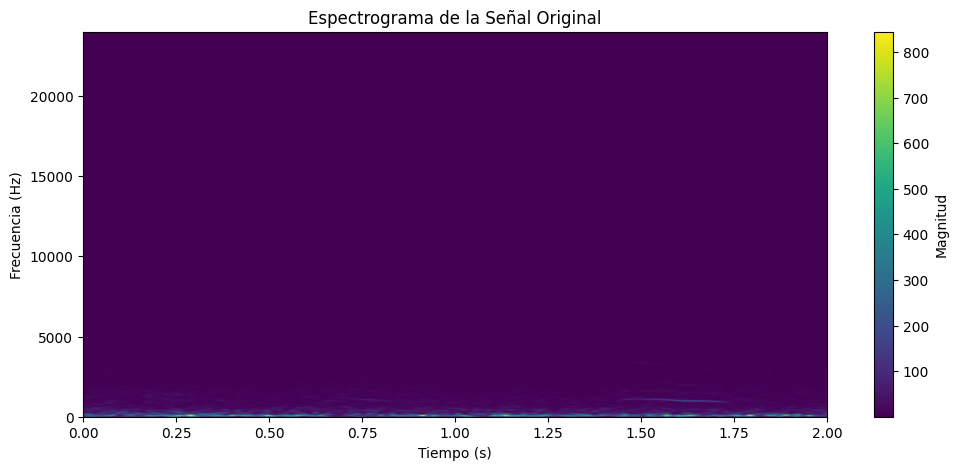

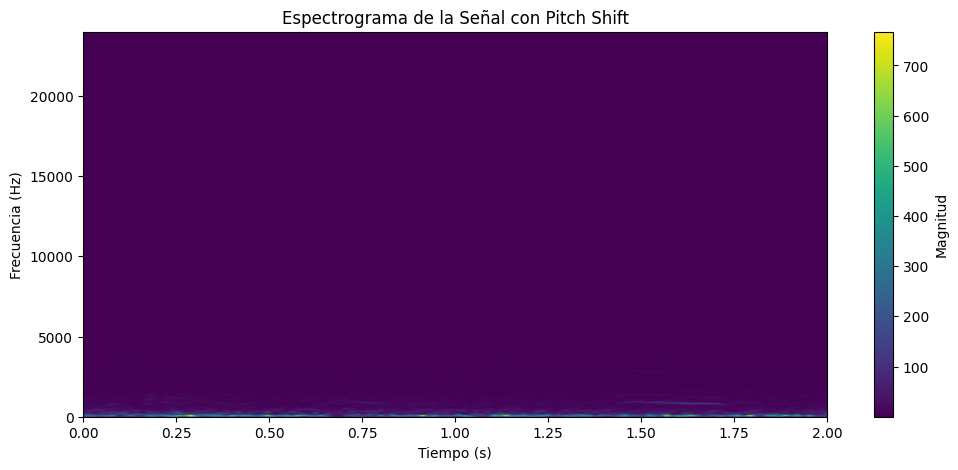

Archivo guardado en: /content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/test_pitch_shift.wav


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, istft

# Ruta del archivo en Google Drive
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/DATA/VNE_31_P2_42_BI.wav"

# Cargar el archivo de audio
sample_rate, audio = wavfile.read(audio_path)

# Si el audio tiene más de un canal, convertirlo a mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1).astype(np.int16)

# Función para aplicar Pitch Shift usando Phase Vocoder
def pitch_shift(audio, sample_rate, semitones):
    factor = 2 ** (semitones / 12)  # Factor de cambio de tono
    window_size = 1024
    hop_size = window_size // 4

    # Calcular la STFT
    f, t, Zxx = stft(audio, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    # Ajustar la frecuencia multiplicando por el factor de cambio de tono
    new_f = f * factor
    shifted_Zxx = np.zeros_like(Zxx, dtype=np.complex_)

    # Interpolación para reubicar las frecuencias en la STFT
    for i in range(len(t)):
        shifted_Zxx[:, i] = np.interp(new_f, f, np.abs(Zxx[:, i])) * np.exp(1j * np.angle(Zxx[:, i]))

    # Reconstrucción de la señal con la iSTFT
    _, shifted_audio = istft(shifted_Zxx, fs=sample_rate, nperseg=window_size, noverlap=hop_size)

    return shifted_audio.astype(np.int16)

# Aplicar Pitch Shift (Ejemplo: +3 semitonos)
shifted_audio = pitch_shift(audio, sample_rate, semitones=3)

# Guardar el archivo modificado en Google Drive
output_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/test_pitch_shift.wav"
wavfile.write(output_path, sample_rate, shifted_audio)

# ----- PLOTEAR GRÁFICAS -----

# 1️⃣ Señales en el dominio del tiempo (Antes y después)
plt.figure(figsize=(12, 4))
time_original = np.linspace(0, len(audio) / sample_rate, num=len(audio))
time_shifted = np.linspace(0, len(shifted_audio) / sample_rate, num=len(shifted_audio))

plt.plot(time_original[:1000], audio[:1000], label="Original")
plt.plot(time_shifted[:1000], shifted_audio[:1000], label="Pitch Shifted", linestyle="dashed")
plt.xlabel("Tiempo (s)")  # Etiqueta del eje X
plt.ylabel("Amplitud")  # Etiqueta del eje Y
plt.title("Comparación en el Dominio del Tiempo")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Espectrograma de la señal original
plt.figure(figsize=(12, 5))
f, t, Zxx = stft(audio, fs=sample_rate, nperseg=1024, noverlap=256)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Espectrograma de la Señal Original")
plt.colorbar(label="Magnitud")
plt.show()

# 3️⃣ Espectrograma de la señal modificada (Pitch Shift)
plt.figure(figsize=(12, 5))
f, t, Zxx = stft(shifted_audio, fs=sample_rate, nperseg=1024, noverlap=256)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Espectrograma de la Señal con Pitch Shift")
plt.colorbar(label="Magnitud")
plt.show()

print(f"Archivo guardado en: {output_path}")